# 듀얼 네트워크

- 현재 국면에 대한 2개값 출력
  - 정책
  - 가치
- 방식
  - CNN을 활용한 ResNet의 레지듀얼 블럭으로 게임 화면의 특징을 추출
  - 정책 출력, 가치 출력의 두가지로 분리
    - 정책(다음 한수)
    - 가치(승패 예측)
  - 2가지를 이용하여 추론한다 

## 듀얼 네트워크의 구조

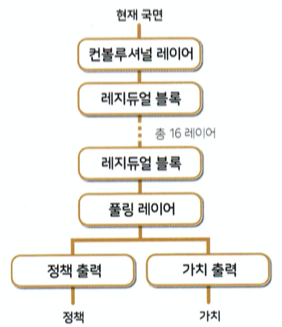

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_듀얼네트워크.png')
# 블럭을 CNN을 이용하여 정책과 가치를 분류해 낸다
# 레이어의 크기는 오리지널 알파 제로보다는 작은 16레이어를 사용

## 듀얼 네트워크의 입력

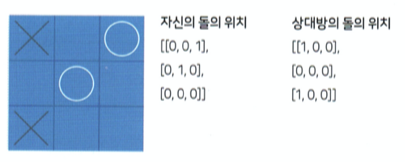

In [ ]:
'''
듀얼 네트워크의 입력
  - 자신의 돌의 위치 (3x3 2차원 배열)
  - 상대발 돌의 위치 (3x3 2차원 배열)
  - 합치면 => (3x3x2)
  - 돌이 있으면 1, 없으면 0 => 이진 데이터
'''
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_입력데이터구성.png')

## 듀얼 네트워크의 출력

- 정책
  - 다음 한수의 확률 분포
  - 행동의 수가 9개 이므로 길이가 9인 배열을 반환
  - 엘리먼트의 총합은 1 => softmax
- 가치
  - 현재 국면에서 승리 예측으로 0~1의 값
  - 길이가 1인 배열 반환

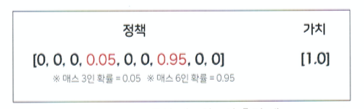

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_듀얼네트워크출력샘플.png')

# ResNet
- 망이 깊어지면 성능이 좋아진다는 개념이, 어느 정도 이상 가면 성능이 더 떨어지는 결과가 나오면서 나온 방식
  - 무작정 늘리면 오히려 성능이 약화된다
- 레지듀얼 블럭(regidual block)이라는 숏컷 구조를 이용하여 대응
- 선행학습 <a href='https://colab.research.google.com/drive/1_bxA18M-Wm26jVHnxS6wpoKFAjZgfzPs?authuser=6#scrollTo=Zyatpp3NLRhi'>링크</a>


## 기본 구성

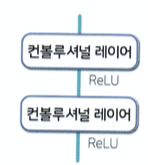

In [ ]:
# 원래 CNN 구조
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_CNN.png')

## 레지듀얼 블럭

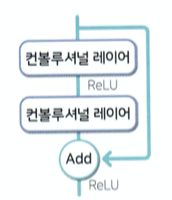

In [ ]:
# ResNet의 레지듀얼 블록의 구조
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_ResNet.png')
# 컨볼루셔널 레이어에 "숏컷 커넥션"이라 불리은 우회 경로를 추가하여
# 학습이 필요 없을때, 우회할수 있도록 하여 보다 깊은 레이어를 통한 학습이 가능하게 구성
# 레이어의 입력을 바로 출력에 연결

### 플레인 아키텍쳐

- plain architecture

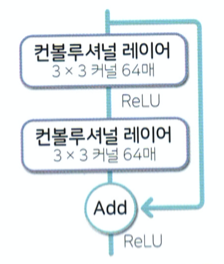

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_plain.png')
# 3x3 사이즈인 동일 매수의 커널을 가진 컨볼루셔널 레이어를 나란히 2개를 사용한것
# 논문 기준 3x3의 커널 64개를 가진 컨볼루션 레이어를 2개 연결

### 보틀넥 아키텍쳐

- bottleneck architecture

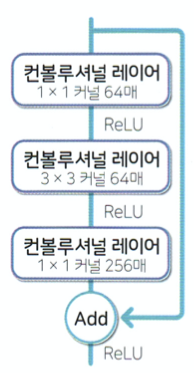

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_bottleneck.png')
# 플레인 보다 1개를 더 가짐
# 1x1 사이즈와 3x3 사이즈 커널의 개수가 동일한 컨볼루션 레이어를 2개를 사용하여 차원을 줄이고,
# 1x1 사이즈 커널의 4배의 커널수를 가진 컨볼루션 레이어에서 차원을 복원한다

### 순수 논문에서 소개한 ResNet 네트워크 구조

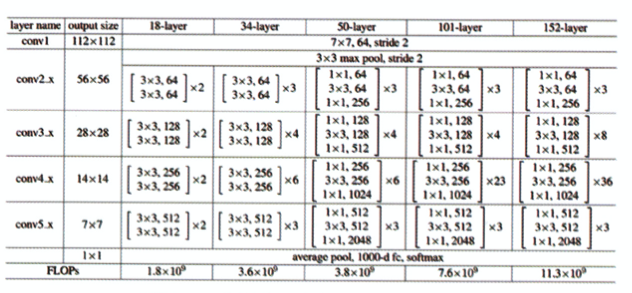

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/alphazero_ori_regiblock.png')

# 레지듀얼 블록

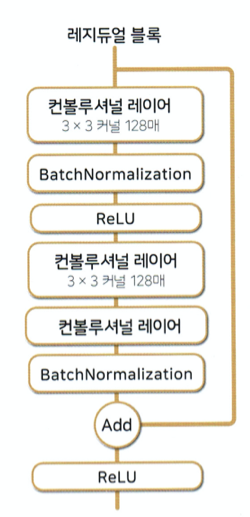

In [ ]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/듀얼네트워크_레지듀얼블록.png')
# 본코드에서 사용한 블록

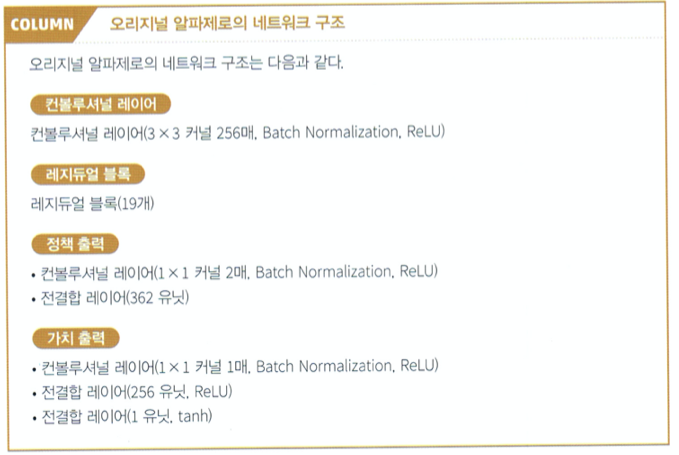

In [ ]:
# 오리지널 구조
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/오리지널알파제로_네트워크.png')

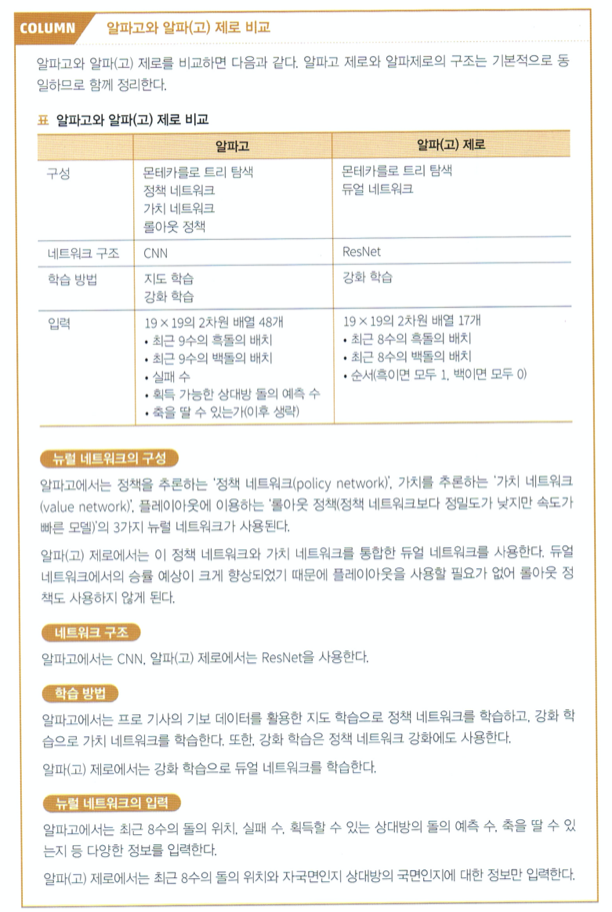

In [8]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/6_7_tictactoe/img/알파고와알파(고)제로.png')

# 시뮬레이션

In [ ]:
# dual_network.py 업로드
from google.colab import files
uploaded = files.upload()

Saving dual_network.py to dual_network.py


In [ ]:
# 폴더 확인
!dir

drive  dual_network.py	sample_data


In [ ]:
# dual_network.p 동작 확인
!python dual_network.py

2020-08-05 07:05:24.971617: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-05 07:05:26.581207: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-05 07:05:26.633551: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-05 07:05:26.633622: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d0d9c8621a97): /proc/driver/nvidia/version does not exist
2020-08-05 07:05:26.679538: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2200000000 Hz
2020-08-05 07:05:26.679834: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2520a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-05 07:05:26.679877: I tensorflow/com

In [ ]:
# 폴더 확인
!dir
!dir ./model/

drive  dual_network.py	model  sample_data
best.h5
